In [1]:
# Load the dataset
import pandas as pd

data_path = 'processed_data.csv'  # Replace with your file path
data = pd.read_csv(data_path)

# Display the maximum and minimum values for each feature
max_values = data.max()
min_values = data.min()

print("Maximum values for each feature:")
print(max_values)

print("\nMinimum values for each feature:")
print(min_values)

Maximum values for each feature:
porosity           29.0
Permeability      700.0
Depth           11950.0
API                45.0
Viscosity          16.0
Temperature       260.0
dtype: float64

Minimum values for each feature:
porosity           3.0
Permeability       0.1
Depth           1150.0
API               19.5
Viscosity          0.2
Temperature       74.0
dtype: float64


# |DBSCAN for Outlier Detection

This cell performs outlier detection using the DBSCAN algorithm. It starts by loading the dataset and using the `NearestNeighbors` method to help choose an appropriate `eps` value for DBSCAN. After determining `eps`, it applies DBSCAN to detect and remove outliers, finally saving the cleaned dataset to a new CSV file.


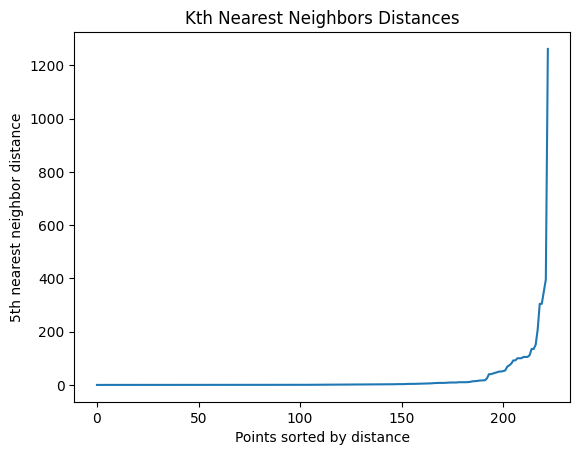

In [2]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'processed_data.csv'  # Replace with your file path
data = pd.read_csv(data_path)

# Using NearestNeighbors to find a suitable eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Plotting the k-nearest neighbors distances to choose eps
plt.plot(distances)
plt.title('Kth Nearest Neighbors Distances')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th nearest neighbor distance')
plt.show()

# DBSCAN for outlier detection
eps_value = 500  # Adjust based on your dataset
dbscan = DBSCAN(eps=eps_value, min_samples=5)
labels = dbscan.fit_predict(data)

# Removing outliers
outliers_mask = labels == -1
data_no_outliers = data[~outliers_mask]

# Save the cleaned data to a new CSV file
data_no_outliers.to_csv('cleaned_data.csv', index=False)


# Plotting and DBSCAN Application

This cell aims to visualize the effect of DBSCAN outlier removal on the dataset. It includes a comparison of the data distribution before and after applying DBSCAN, focusing on two features: 'porosity' and 'Permeability'. It also repeats the DBSCAN application with an `eps_value`, which should be adjusted based on previous steps or domain knowledge.


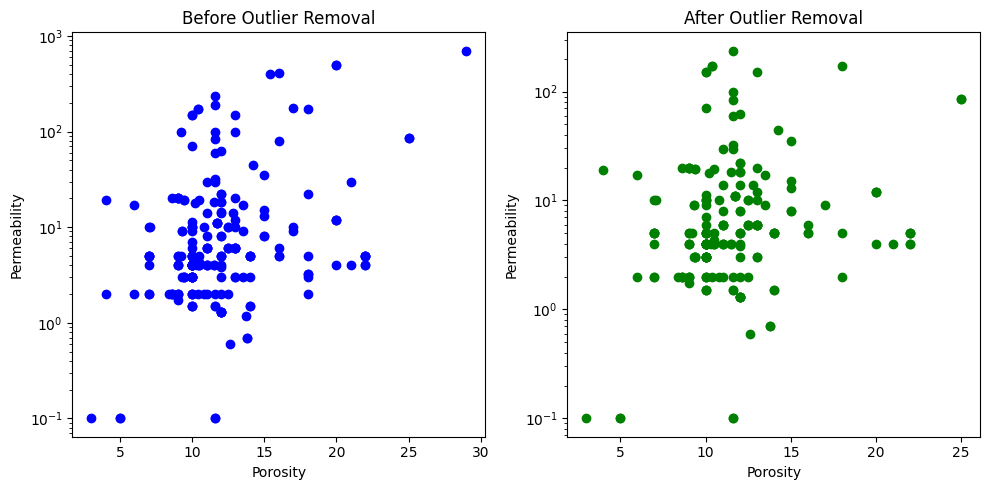

22

In [3]:
# Choosing an eps value based on the plot - this is a bit subjective and might need adjustment
eps_value = 250 # This is a starting point and may need to be adjusted based on domain knowledge or experimentation

# Applying DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=5)
labels = dbscan.fit_predict(data)

# Identifying core and outlier points
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
outliers_mask = labels == -1

# Data without outliers
data_no_outliers = data[~outliers_mask]

# Plotting the data after outlier removal
plt.figure(figsize=(10, 5))

# Plot before DBSCAN (repeated for comparison)
plt.subplot(1, 2, 1)
plt.scatter(data['porosity'], data['Permeability'], c='blue', label='Original Data')
plt.title('Before Outlier Removal')
plt.xlabel('Porosity')
plt.ylabel('Permeability')
plt.yscale('log')
# Plot after DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(data_no_outliers['porosity'], data_no_outliers['Permeability'], c='green', label='Data without Outliers')
plt.title('After Outlier Removal')
plt.xlabel('Porosity')
plt.ylabel('Permeability')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Returning the number of outliers detected to provide some context
num_outliers_detected = np.sum(outliers_mask)
num_outliers_detected


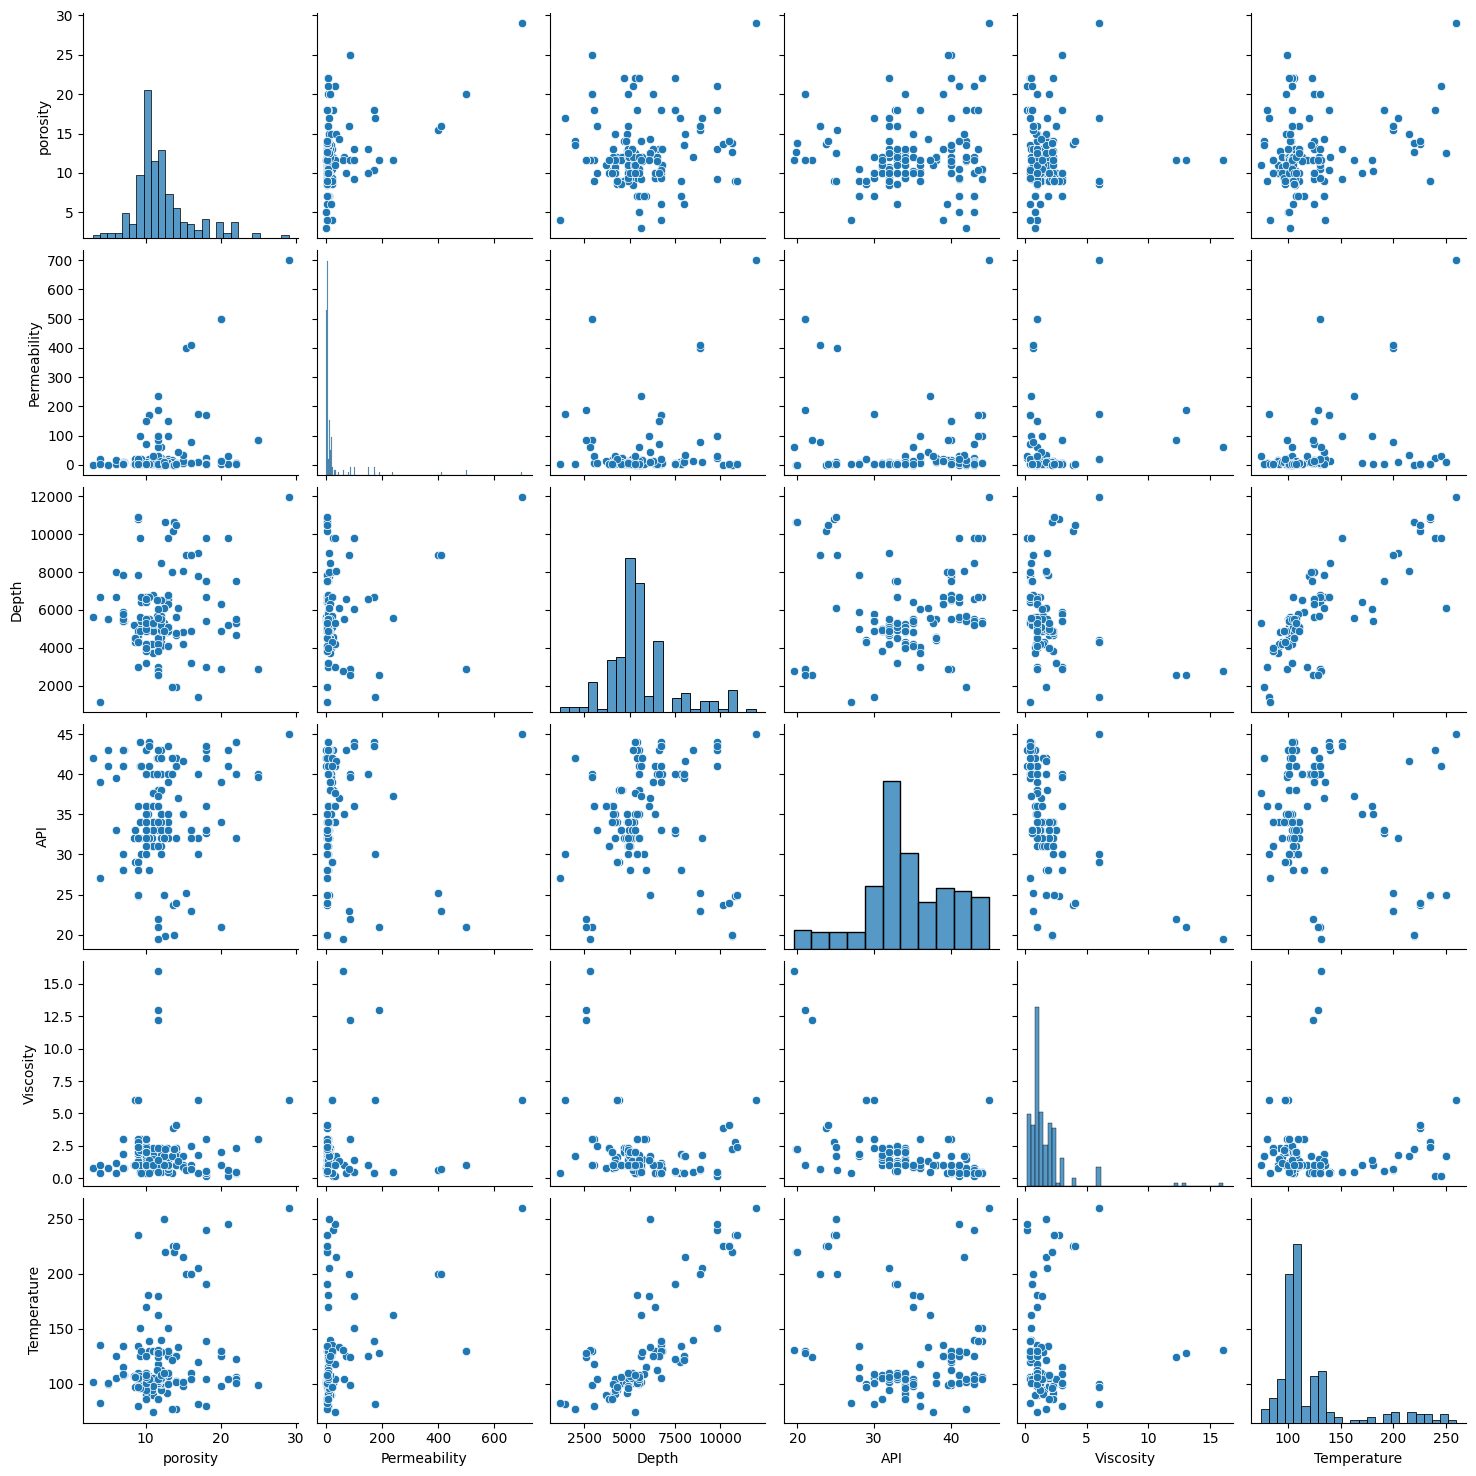

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data_path = 'processed_data.csv'
df = pd.read_csv(data_path)

# Create pair plot
sns.pairplot(df)
plt.show()


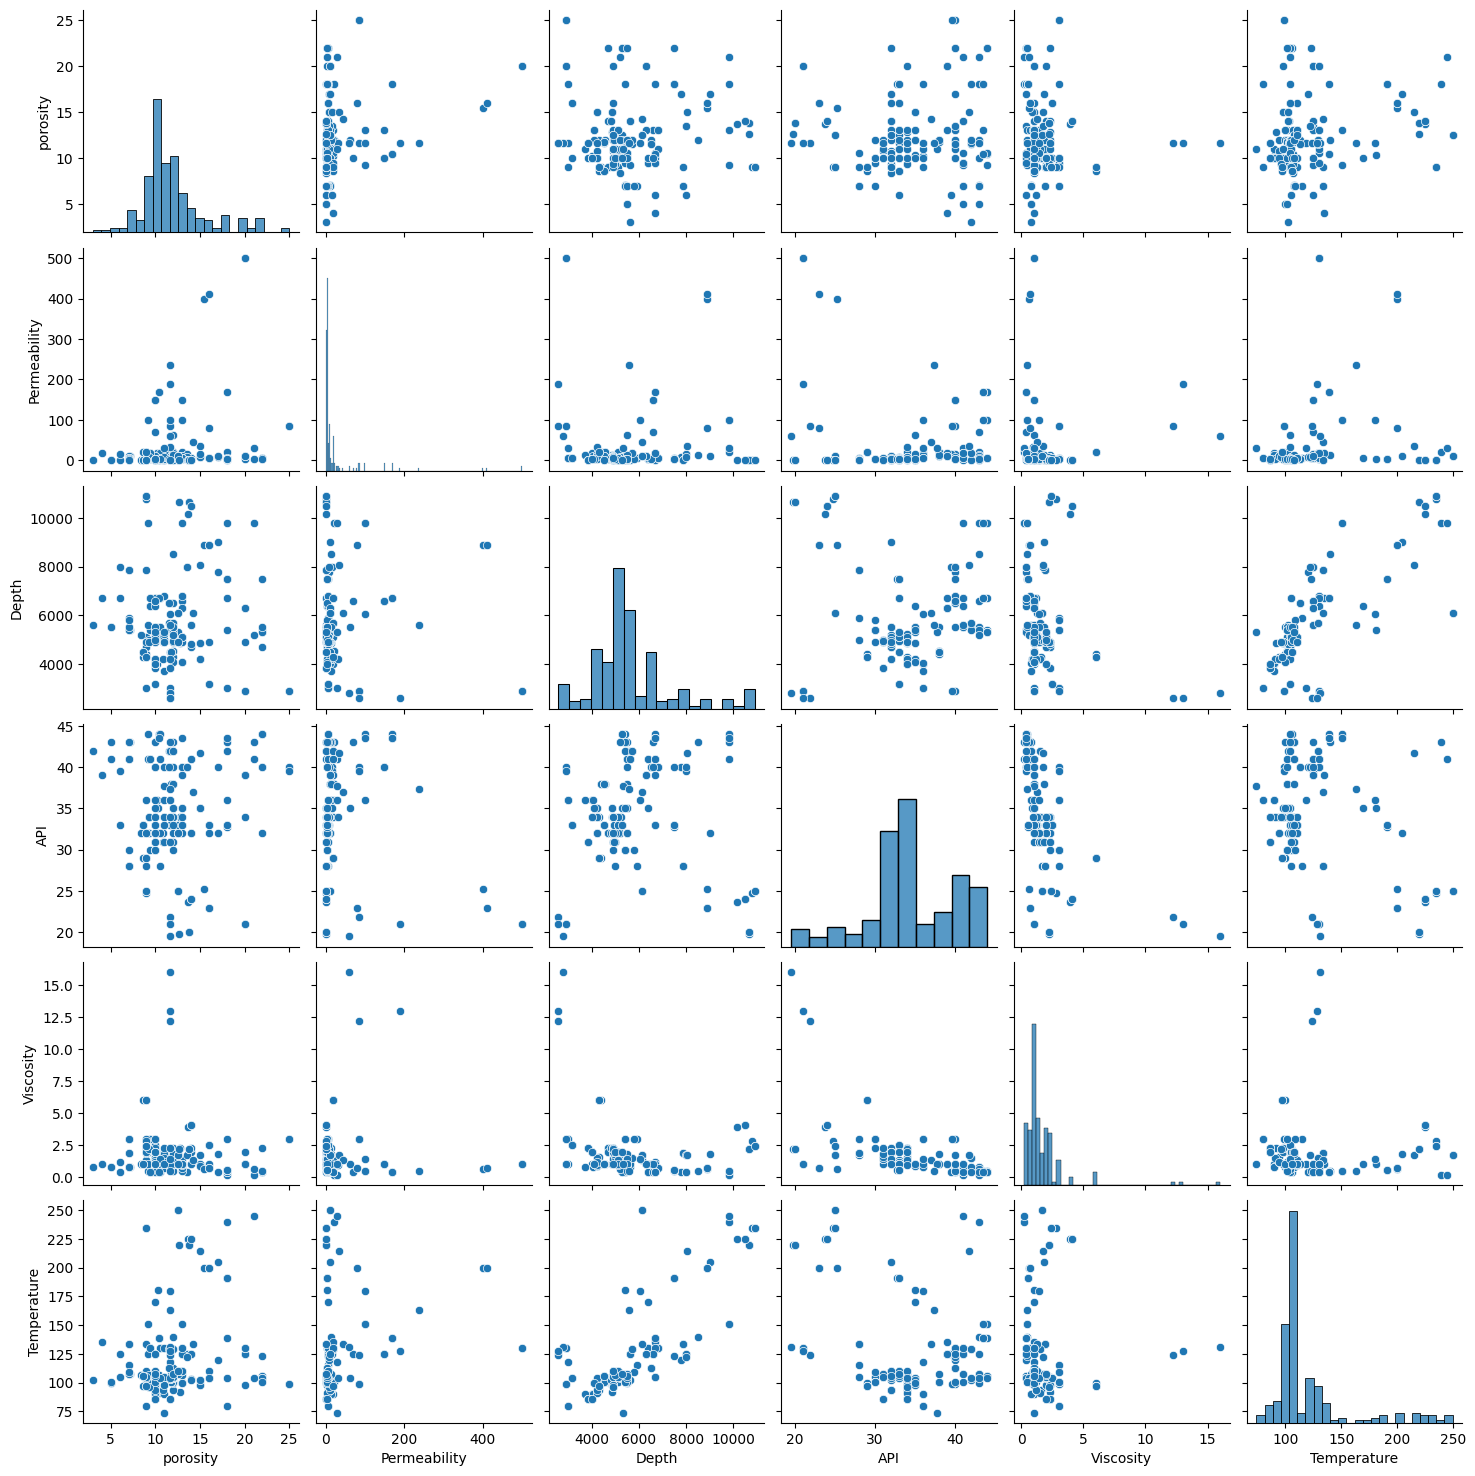

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data_path = 'cleaned_data.csv'
df = pd.read_csv(data_path)

# Create pair plot
sns.pairplot(df)


# PCA and Model Predictions

In this cell, we load a cleaned dataset, apply standard scaling and PCA for dimensionality reduction, and then use pre-trained logistic regression and random forest models to predict labels based on the transformed data. The predicted labels are added to the dataset, which is then saved to a new CSV file.


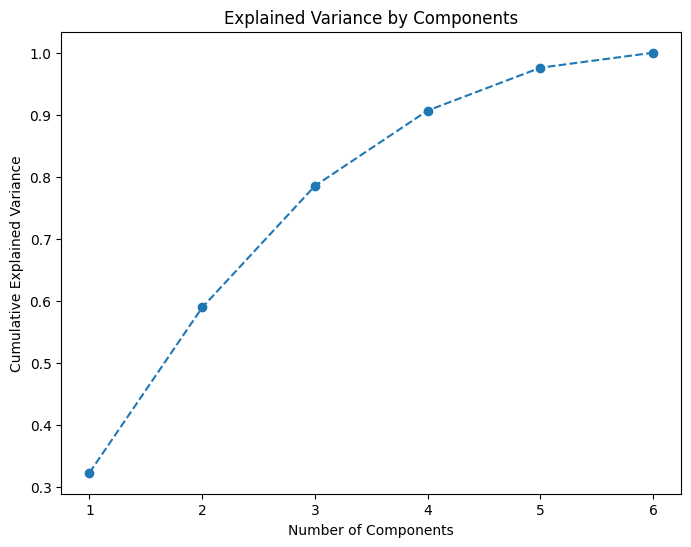

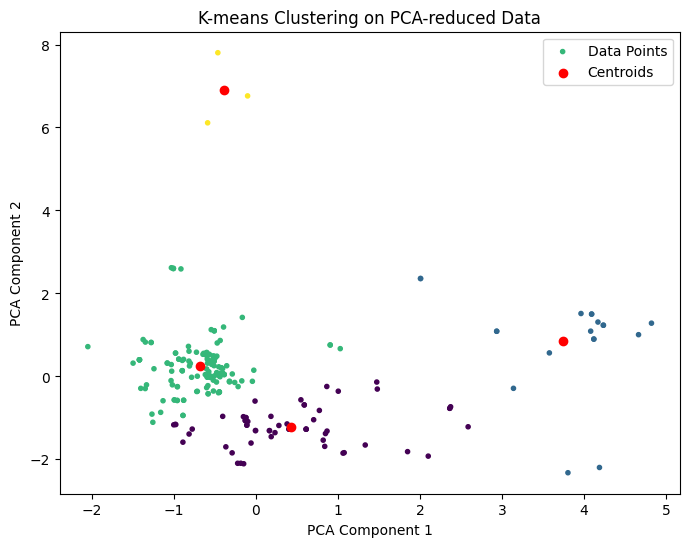

In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load the cleaned data
cleaned_data_path = 'cleaned_data.csv'  # Adjust this path
cleaned_data = pd.read_csv(cleaned_data_path)

# Standardizing the features before PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cleaned_data)

# Apply PCA without reducing dimensionality to compute full explained variance
pca_full = PCA()
pca_full.fit(data_scaled)

# Plotting the cumulative explained variance by each component
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# K-means clustering with k=5
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', marker='.', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', label='Centroids')
plt.title('K-means Clustering on PCA-reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


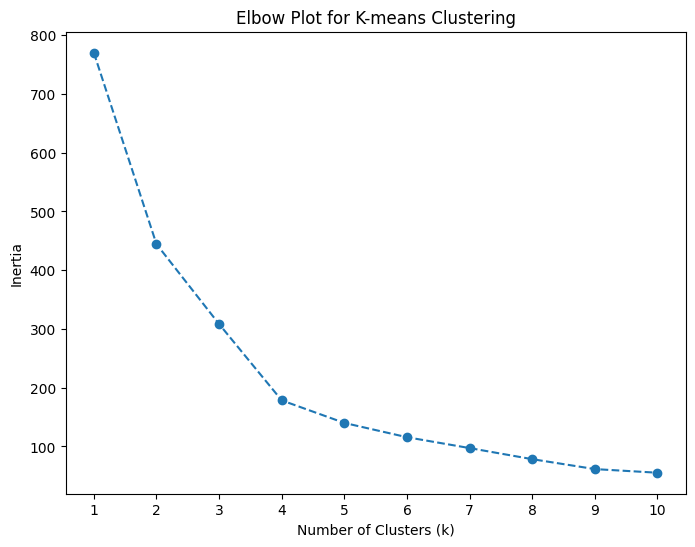

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned data
cleaned_data_path = 'cleaned_data.csv'  # Adjust this path
cleaned_data = pd.read_csv(cleaned_data_path)

# Standardizing the features before PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cleaned_data)

# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Calculate the inertia for different values of k
inertia = []
for k in range(1, 11):  # Trying k from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Plot for K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, 11, 1))  # Adjust x ticks to show integers only
plt.grid(False)
plt.show()


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned data
cleaned_data_path = 'cleaned_data.csv'  # Adjust this path
cleaned_data = pd.read_csv(cleaned_data_path)

# Standardizing the features before PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cleaned_data)

# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Calculate the inertia for different values of k
inertia = []
for k in range(1, 11):  # Trying k from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Plot for K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, 11, 1))  # Adjust x ticks to show integers only
plt.grid(False)
plt.show()


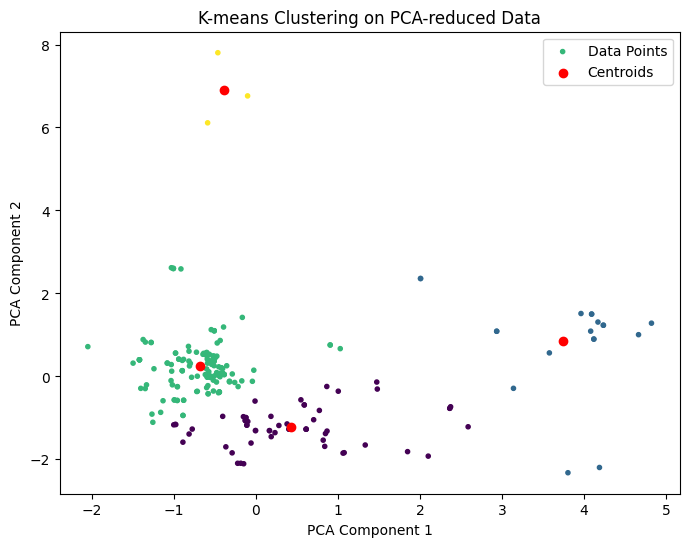

In [8]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load the cleaned data
cleaned_data_path = 'cleaned_data.csv'  # Adjust this path
cleaned_data = pd.read_csv(cleaned_data_path)

# Standardizing the features before PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cleaned_data)

# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# K-means clustering with k=5
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', marker='.', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', label='Centroids')
plt.title('K-means Clustering on PCA-reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


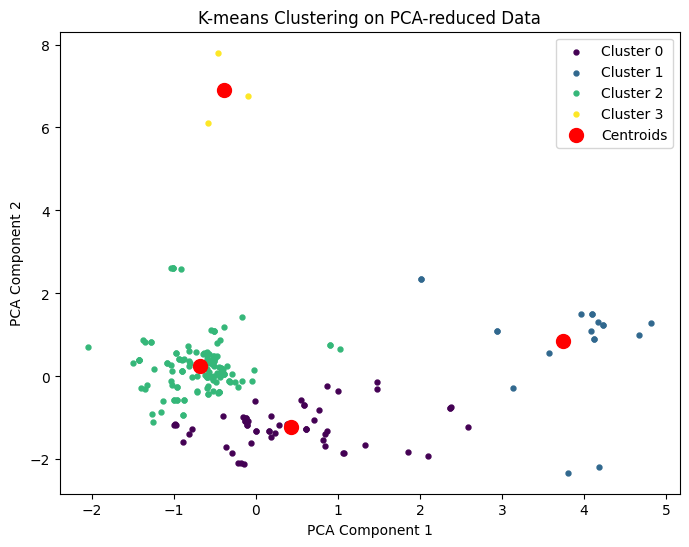

In [9]:
plt.figure(figsize=(8, 6))

# Define colors for each cluster
colors = plt.cm.viridis(np.linspace(0, 1, kmeans.n_clusters))

# Plot each cluster
for i in range(kmeans.n_clusters):
    # Select only data points with the target cluster label
    cluster_data = data_pca[labels == i]
    
    # Plot data points for this cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, c=[colors[i]], label=f'Cluster {i}', marker='.')
    
# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', s=100, label='Centroids')

plt.title('K-means Clustering on PCA-reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Ensure unique legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()


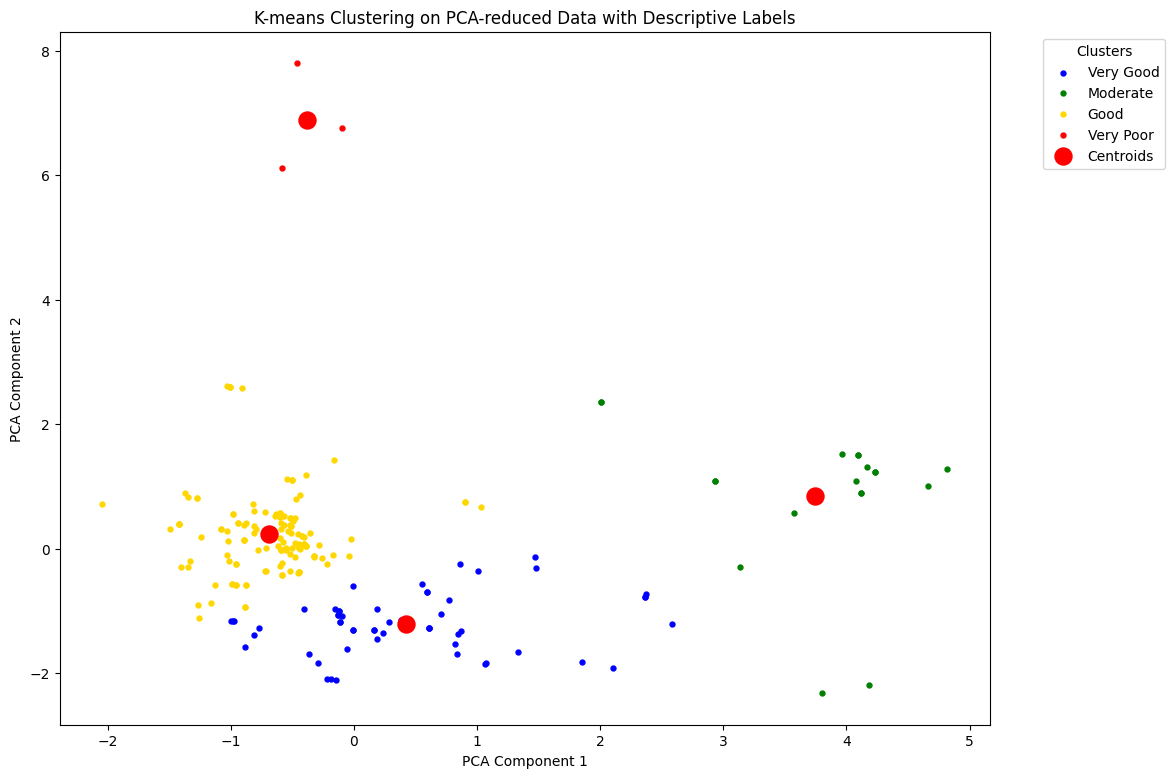

In [10]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
cleaned_data_path = 'cleaned_data.csv'  # Adjust this to your file path
cleaned_data = pd.read_csv(cleaned_data_path)

# Assuming the data is ready for analysis, dropping non-numeric columns for PCA
numeric_data = cleaned_data.select_dtypes(include=[np.number])

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# K-means clustering with k=5
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Map cluster labels to descriptive labels
cluster_labels = {0: 'Very Good', 1: 'Moderate', 2: 'Good', 3: 'Very Poor'}
descriptive_labels = [cluster_labels[label] for label in labels]

# Define colors for each cluster using the descriptive labels
color_map = {'Very Good': 'blue', 'Moderate': 'green', 'Good': 'gold', 'Very Poor': 'red' }
colors = [color_map[label] for label in descriptive_labels]

plt.figure(figsize=(12, 9))

# Plot each cluster with its descriptive label
for i, label in enumerate(cluster_labels.values()):
    cluster_data = data_pca[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, c=color_map[label], label=label, marker='.')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', s=150, label='Centroids')

plt.title('K-means Clustering on PCA-reduced Data with Descriptive Labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [11]:
# Here, use 'kmeans.labels_' directly to ensure correct label assignment
cleaned_data['Cluster_Label'] = kmeans.labels_

# Convert the 'Cluster_Label' column to integers
cleaned_data['Cluster_Label'] = cleaned_data['Cluster_Label'].astype(int)

# Saving this new dataframe with cluster labels to a new CSV file
clustered_data_path = 'cleaned_data_with_labels_new.csv'
cleaned_data.to_csv(clustered_data_path, index=False)

# Return the path for download
print(clustered_data_path)


cleaned_data_with_labels_new.csv


In [12]:
# Define the cluster labels mapping
cluster_labels_mapping = {0: 'Very Good', 1: 'Moderate', 2: 'Good', 3: 'Very Poor'}

# Identify the columns corresponding to cluster labels
cluster_label_columns = ['Cluster_Label']  # Adjust this list based on your column names

# Convert the identified columns to text
for column in cluster_label_columns:
    cleaned_data[column] = "'" + cleaned_data[column].map(cluster_labels_mapping).astype(str)

# Saving the DataFrame with identified columns treated as text to a new CSV file
clustered_data_path = 'cleaned_data_with_labels_new11.csv'
cleaned_data.to_csv(clustered_data_path, index=False)

# Return the path for download
print(clustered_data_path)


cleaned_data_with_labels_new11.csv


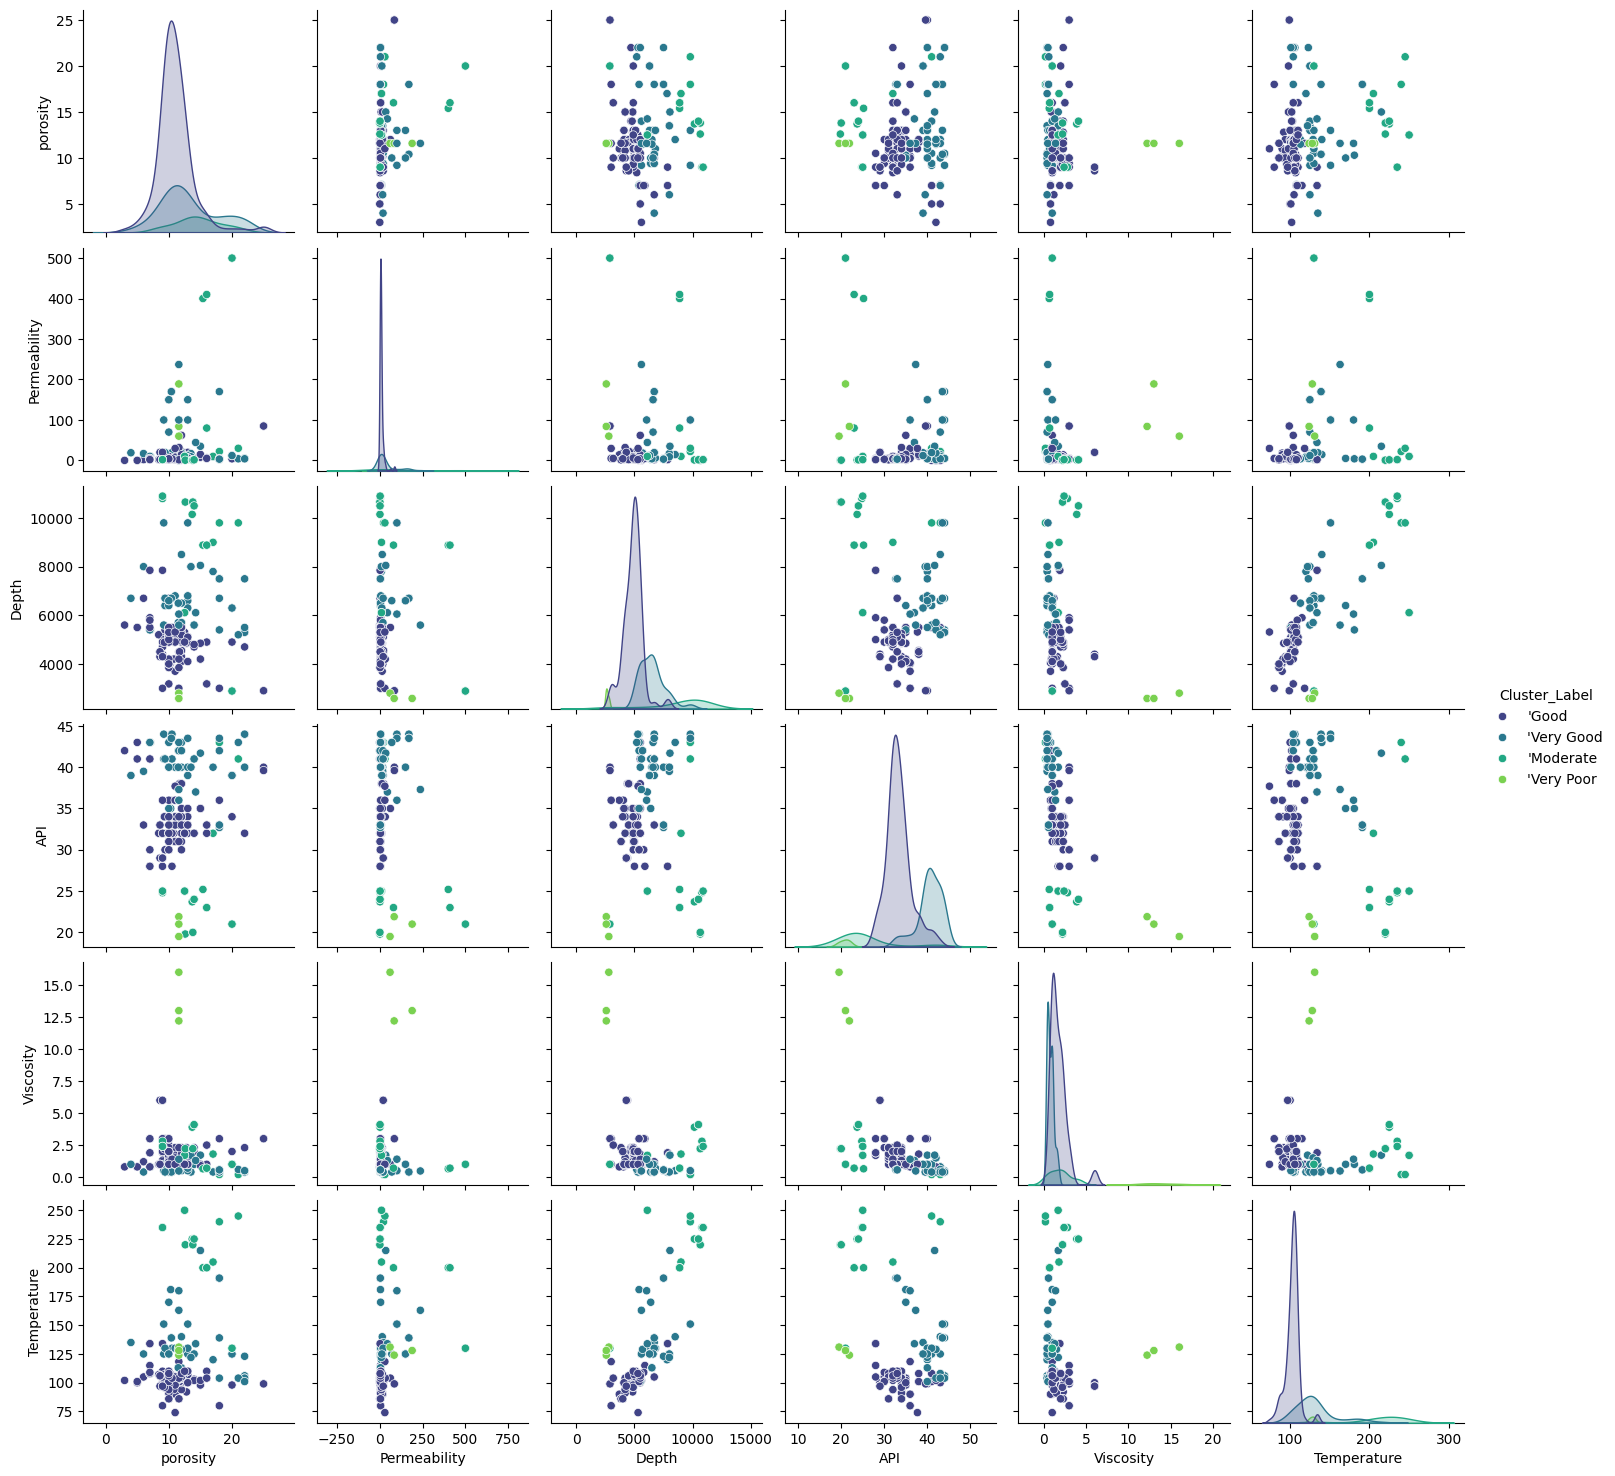

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("cleaned_data_with_labels_new11.csv")

# Define the columns for which you want to create the pair plot
columns_for_pairplot = data.columns.drop('Cluster_Label')

# Define the column to use for coloring
cluster_label_column = 'Cluster_Label'

# Create the pair plot
sns.pairplot(data=data, vars=columns_for_pairplot, hue=cluster_label_column, palette='viridis')
plt.show()


In [14]:
import pandas as pd

# Assuming you've already loaded your data into a DataFrame data
# and computed cluster_summary_stats and cluster_counts
data_path = 'cleaned_data_with_labels_new.csv'  # Replace with your file path
data = pd.read_csv(data_path)

# Define cluster_summary_stats and cluster_counts
# For example:
cluster_summary_stats = data.groupby('Cluster_Label').describe()
cluster_counts = data['Cluster_Label'].value_counts()

# Flatten the multi-level columns by joining level 0 (the original column names)
# with level 1 (the aggregation functions), using an underscore or another separator.
cluster_summary_stats.columns = ['_'.join(col).strip() for col in cluster_summary_stats.columns.values]

# Now that cluster_summary_stats has single-level columns, you can join it with cluster_counts
cluster_summary = cluster_summary_stats.join(cluster_counts.rename('Count'))

# Create a DataFrame containing the summary statistics
summary_statistics = pd.DataFrame({
    'Mean': cluster_summary.mean(),
    'Standard Deviation': cluster_summary.std(),
    'Minimum': cluster_summary.min(),
    'Maximum': cluster_summary.max()
})

# Write the summary statistics DataFrame to a CSV file named "summary.csv"
summary_statistics.to_csv('summary.csv')

# Display the summary statistics DataFrame
print(data.columns)


Index(['porosity', 'Permeability', 'Depth', 'API', 'Viscosity', 'Temperature',
       'Cluster_Label'],
      dtype='object')


## Spliting Dtat to train and test

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_path = 'cleaned_data_with_labels_new.csv'  # Replace with your file path
data = pd.read_csv(data_path)

# Selecting the specified features and the target variable
X = data[["porosity", "Permeability", "Depth", "API", "Viscosity", "Temperature"]]
y = data["Cluster_Label"]

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((174, 6), (44, 6), (174,), (44,))

## Applaying KNN
- Confusion Matrix
- Classification Report


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Starting with k=5
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9318181818181818
Confusion Matrix:
 [[ 9  0  0  0]
 [ 0  3  0  0]
 [ 1  0 29  0]
 [ 0  0  2  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      1.00      1.00         3
           2       0.94      0.97      0.95        30
           3       0.00      0.00      0.00         2

    accuracy                           0.93        44
   macro avg       0.71      0.74      0.72        44
weighted avg       0.89      0.93      0.91        44



C:\Users\ARSENAL CENTER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ARSENAL CENTER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ARSENAL CENTER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

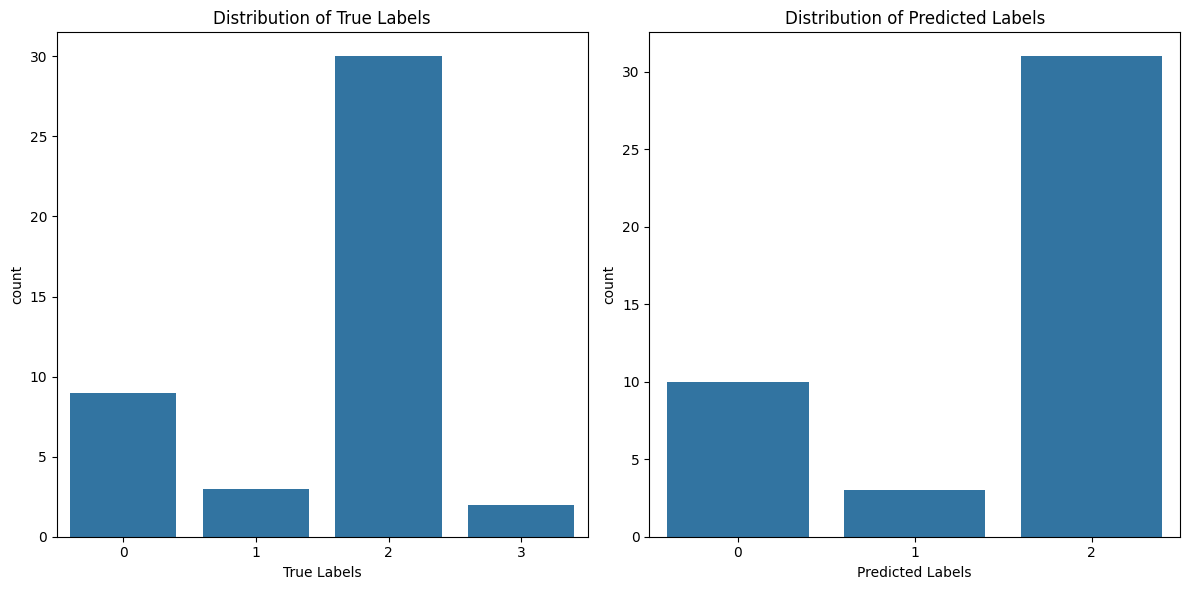

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with true and predicted labels
results_df = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': y_pred})

# Plotting the distribution of true vs. predicted labels
plt.figure(figsize=(12, 6))

# True Labels
plt.subplot(1, 2, 1)
sns.countplot(x='True Labels', data=results_df)
plt.title('Distribution of True Labels')

# Predicted Labels
plt.subplot(1, 2, 2)
sns.countplot(x='Predicted Labels', data=results_df)
plt.title('Distribution of Predicted Labels')

plt.tight_layout()
plt.show()


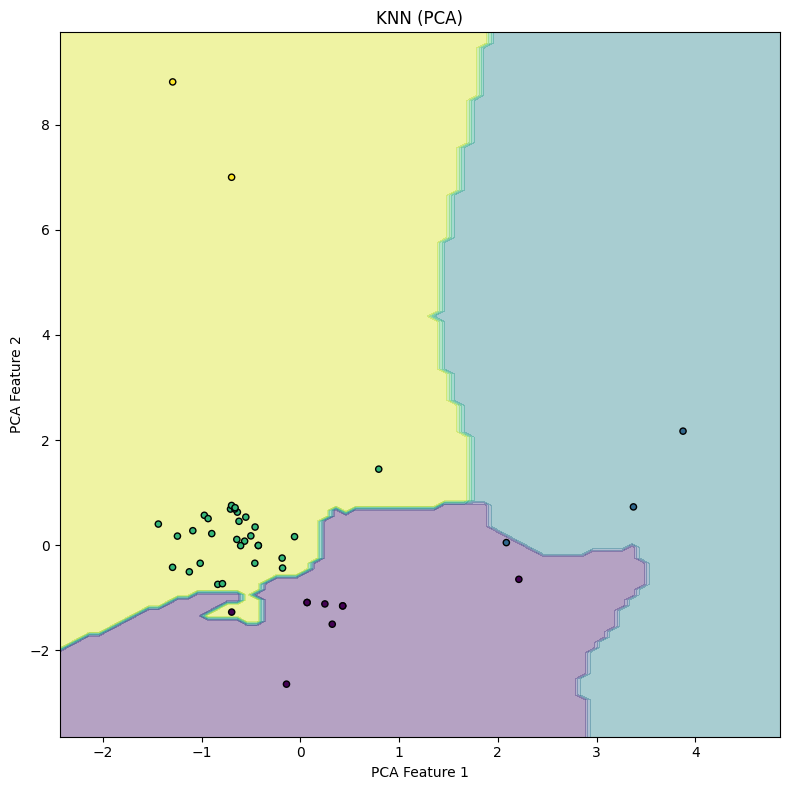

In [32]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_train_scaled, X_test_scaled, and y_train are already defined and scaled appropriately

# Define and train the PCA model to reduce dimensionality
pca_model = PCA(n_components=2)
X_train_pca = pca_model.fit_transform(X_train_scaled)
X_test_pca = pca_model.transform(X_test_scaled)

# Train a KNN model on the PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k) as needed
knn_pca.fit(X_train_pca, y_train)

# Function to plot decision boundaries for 2D data
def plot_decision_boundary_knn(X, y, model, title):
    # Define the canvas
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to plot
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')

plt.figure(figsize=(8, 8))

# Plot decision boundary for KNN
plot_decision_boundary_knn(X_test_pca, y_test, knn_pca, "KNN (PCA)")

plt.tight_layout()
plt.show()


In [18]:
# Assuming your data preprocessing steps are correctly executed
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the scaled training data
knn.fit(X_train_scaled, y_train)
# Normalize the new data point using the same scaler instance
new_data = np.array([[10, 100, 5500, 35, 1, 150]])
new_data_scaled = scaler.transform(new_data)

# Predict the cluster label for the new data point
predicted_label = knn.predict(new_data_scaled)

print(f"Predicted Cluster Label: {predicted_label[0]}")


Predicted Cluster Label: 0


C:\Users\ARSENAL CENTER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Logistic Regression and Random Forest Model Fitting

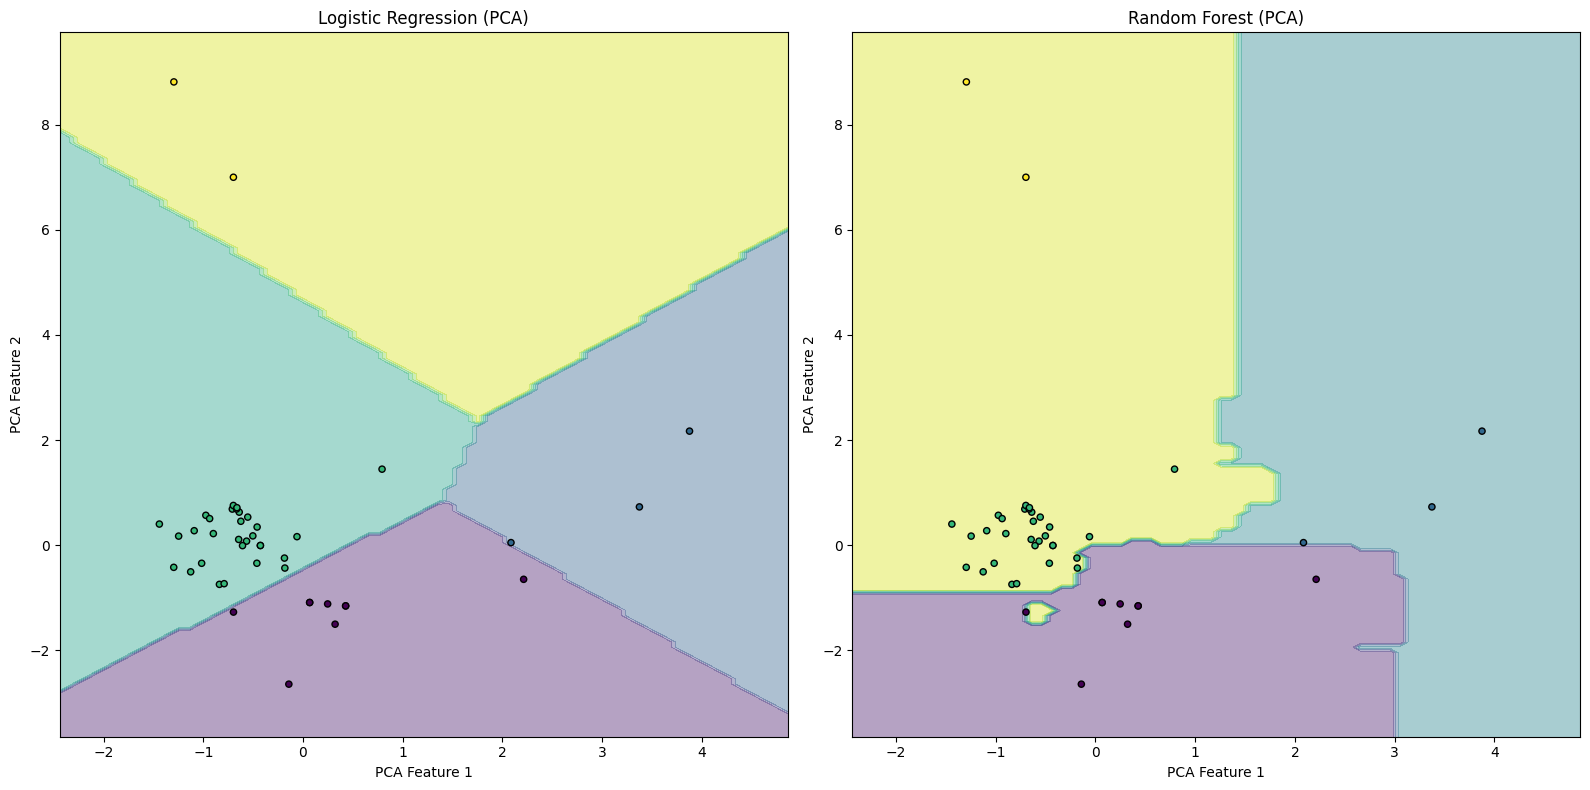

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load the dataset
data_path = 'cleaned_data_with_labels_new.csv'  # Replace with your file path
data = pd.read_csv(data_path)

# Selecting the specified features and the target variable
X = data[["porosity", "Permeability", "Depth", "API", "Viscosity", "Temperature"]]
y = data["Cluster_Label"]

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the PCA model
pca_model = PCA(n_components=2)  # Assuming you want to reduce the dimensionality to 2
X_train_pca = pca_model.fit_transform(X_train_scaled)
X_test_pca = pca_model.transform(X_test_scaled)

# Train a Random Forest model on the PCA-transformed data
random_forest_pca = RandomForestClassifier().fit(X_train_pca, y_train)

# Train a Logistic Regression model on the PCA-transformed data
log_reg_pca = LogisticRegression(max_iter=1000).fit(X_train_pca, y_train)

# Function to plot decision boundaries for 2D data
def plot_decision_boundary(X, y, model, title):
    # Define the canvas
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to plot
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')

plt.figure(figsize=(16, 8))

# Plot decision boundary for Logistic Regression
plt.subplot(1, 2, 1)
plot_decision_boundary(X_test_pca, y_test, log_reg_pca, "Logistic Regression (PCA)")

# Plot decision boundary for Random Forest
plt.subplot(1, 2, 2)
plot_decision_boundary(X_test_pca, y_test, random_forest_pca, "Random Forest (PCA)")

plt.tight_layout()
plt.show()


In [20]:
# Assuming you have already performed PCA on your data and obtained X_train_pca and y_train

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define and train Logistic Regression model
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train)

# Define and train Random Forest model
random_forest_pca = RandomForestClassifier()
random_forest_pca.fit(X_train_pca, y_train)


RandomForestClassifier()

Accuracy (Logistic Regression): 1.0
Accuracy (Random Forest): 0.9318181818181818
Confusion Matrix (Logistic Regression):
 [[ 9  0  0  0]
 [ 0  3  0  0]
 [ 0  0 30  0]
 [ 0  0  0  2]]
Confusion Matrix (Random Forest):
 [[ 8  0  1  0]
 [ 0  3  0  0]
 [ 0  0 30  0]
 [ 0  0  2  0]]
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00         2

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00         3
           2       0.91      1.00    

C:\Users\ARSENAL CENTER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ARSENAL CENTER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ARSENAL CENTER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

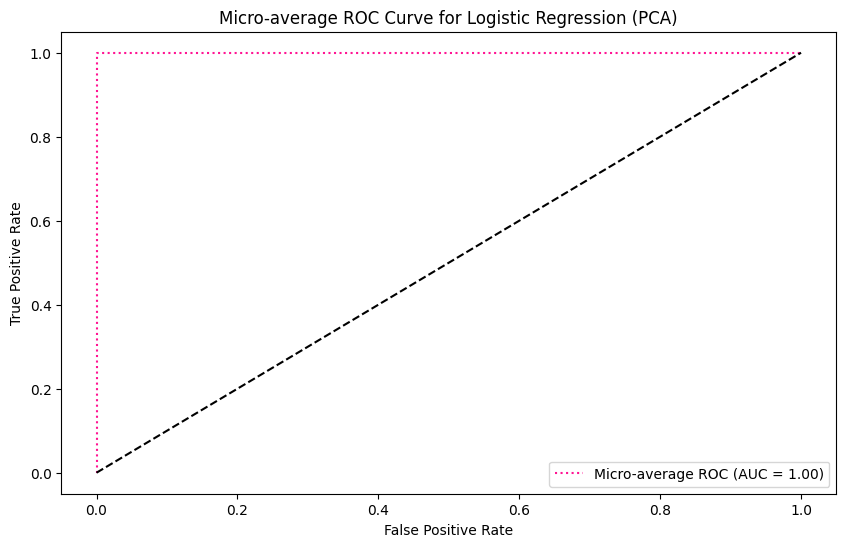

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Load the dataset
data_path = 'cleaned_data_with_labels_new.csv'  # Replace with your file path
data = pd.read_csv(data_path)

# Selecting the specified features and the target variable
X = data[["porosity", "Permeability", "Depth", "API", "Viscosity", "Temperature"]]
y = data["Cluster_Label"]

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Make predictions
y_pred_log_reg = log_reg_pca.predict(X_test_pca)
y_pred_random_forest = random_forest_pca.predict(X_test_pca)

# Compute accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

print("Accuracy (Logistic Regression):", accuracy_log_reg)
print("Accuracy (Random Forest):", accuracy_random_forest)

# Compute confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)

print("Confusion Matrix (Logistic Regression):\n", conf_matrix_log_reg)
print("Confusion Matrix (Random Forest):\n", conf_matrix_random_forest)

# Classification report
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log_reg))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_random_forest))
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Compute the predicted probabilities for each class
y_pred_prob_log_reg = log_reg_pca.predict_proba(X_test_pca)

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_pred_prob_log_reg.ravel())
roc_auc_micro = roc_auc_score(y_test_binarized, y_pred_prob_log_reg, average="micro")

# Plot the micro-average ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC (AUC = {roc_auc_micro:.2f})', color='deeppink', linestyle=':')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve for Logistic Regression (PCA)')
plt.legend()
plt.show()


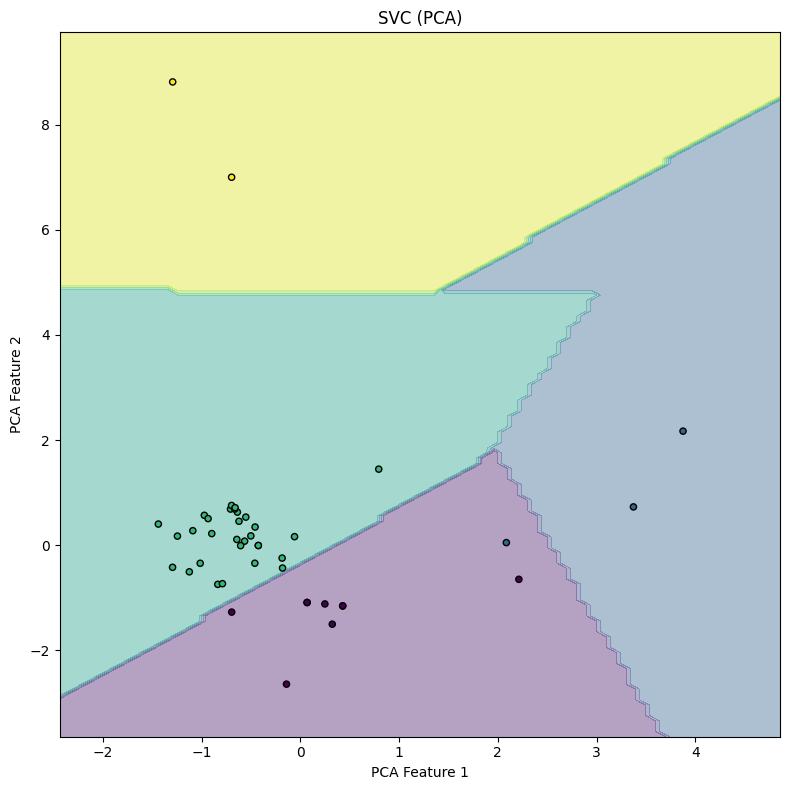

In [22]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_train_scaled and X_test_scaled are already defined and scaled appropriately

# Define and train the PCA model to reduce dimensionality
pca_model = PCA(n_components=2)
X_train_pca = pca_model.fit_transform(X_train_scaled)
X_test_pca = pca_model.transform(X_test_scaled)

# Train an SVC model on the PCA-transformed data
svc_pca = SVC(kernel='linear', probability=True).fit(X_train_pca, y_train)

# Function to plot decision boundaries for 2D data
def plot_decision_boundary_svc(X, y, model, title):
    # Define the canvas
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to plot
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')

plt.figure(figsize=(8, 8))

# Plot decision boundary for SVC
plot_decision_boundary_svc(X_test_pca, y_test, svc_pca, "SVC (PCA)")

plt.tight_layout()
plt.show()


In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming your data is loaded and preprocessed
# X_train, X_test, y_train, y_test are available

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVC model
svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(X_train_scaled, y_train)

# Evaluate SVC model
y_pred = svc_model.predict(X_test_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute classification report
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9545454545454546
Confusion Matrix:
 [[ 9  0  0  0]
 [ 0  3  0  0]
 [ 2  0 28  0]
 [ 0  0  0  2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      1.00      1.00         3
           2       1.00      0.93      0.97        30
           3       1.00      1.00      1.00         2

    accuracy                           0.95        44
   macro avg       0.95      0.98      0.97        44
weighted avg       0.96      0.95      0.96        44



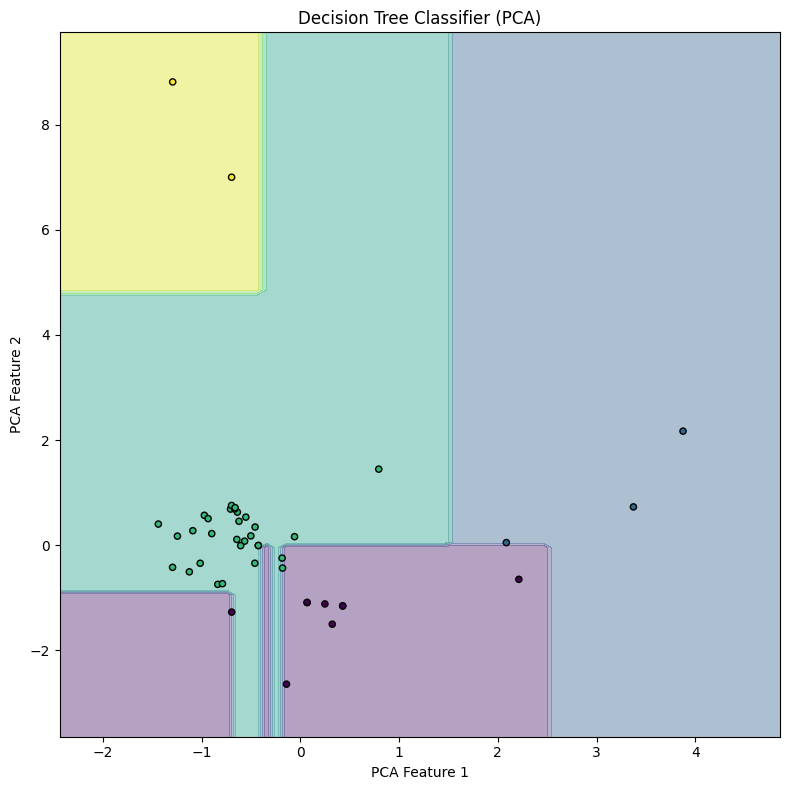

Accuracy: 0.9545454545454546
Confusion Matrix:
 [[ 9  0  0  0]
 [ 0  3  0  0]
 [ 1  0 29  0]
 [ 0  1  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.75      1.00      0.86         3
           2       1.00      0.97      0.98        30
           3       1.00      0.50      0.67         2

    accuracy                           0.95        44
   macro avg       0.91      0.87      0.86        44
weighted avg       0.96      0.95      0.95        44



In [24]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_train_scaled and X_test_scaled are already defined and scaled appropriately

# Define and train the PCA model to reduce dimensionality
pca_model = PCA(n_components=2)
X_train_pca = pca_model.fit_transform(X_train_scaled)
X_test_pca = pca_model.transform(X_test_scaled)

# Train a DecisionTreeClassifier model on the PCA-transformed data
dtc_pca = DecisionTreeClassifier().fit(X_train_pca, y_train)

# Function to plot decision boundaries for 2D data with DecisionTreeClassifier
def plot_decision_boundary_dtc(X, y, model, title):
    # Define the canvas
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to plot
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')

plt.figure(figsize=(8, 8))

# Plot decision boundary for DecisionTreeClassifier
plot_decision_boundary_dtc(X_test_pca, y_test, dtc_pca, "Decision Tree Classifier (PCA)")

plt.tight_layout()
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming your data is loaded and preprocessed
# X_train, X_test, y_train, y_test are available

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train DecisionTreeClassifier model
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train_scaled, y_train)

# Evaluate DecisionTreeClassifier model
y_pred = dtc_model.predict(X_test_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute classification report
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


In [25]:
print(data['Cluster_Label'].unique())


[2 0 1 3]


C:\Users\ARSENAL CENTER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy: 0.9318181818181818
Confusion Matrix:
 [[ 9  0  0  0]
 [ 0  3  0  0]
 [ 0  1 29  0]
 [ 0  0  2  0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.75      1.00      0.86         3
           2       0.94      0.97      0.95        30
           3       0.00      0.00      0.00         2

    accuracy                           0.93        44
   macro avg       0.67      0.74      0.70        44
weighted avg       0.89      0.93      0.91        44

232/313 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step

C:\Users\ARSENAL CENTER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ARSENAL CENTER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ARSENAL CENTER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step


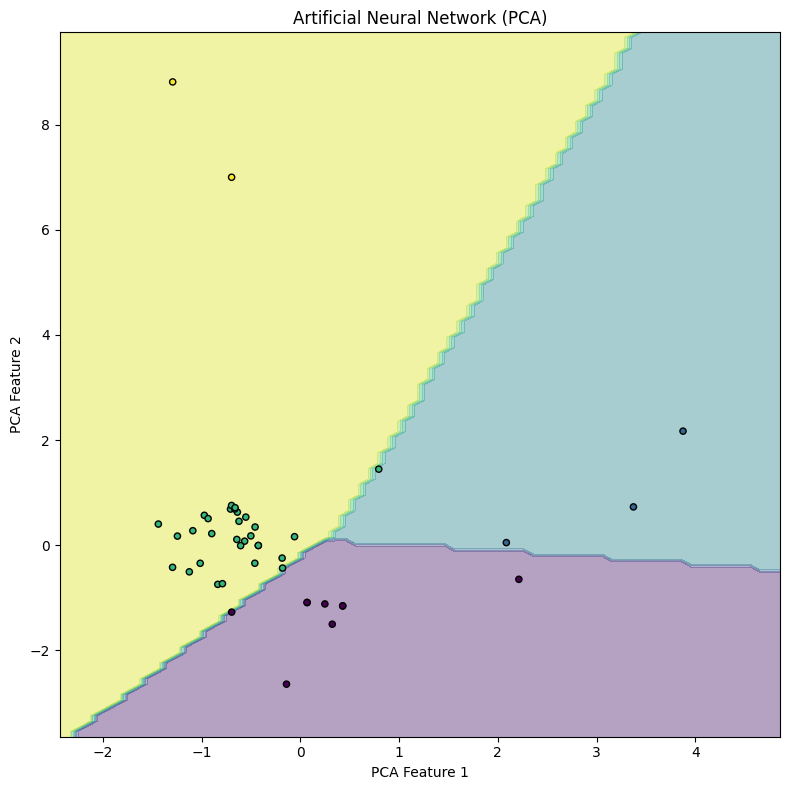

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf

# Load the dataset
data_path = 'cleaned_data_with_labels_new.csv'  # Replace with your file path
data = pd.read_csv(data_path)

# Selecting the specified features and the target variable
X = data[["porosity", "Permeability", "Depth", "API", "Viscosity", "Temperature"]]
y = data["Cluster_Label"]

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the PCA model to reduce dimensionality
pca_model = PCA(n_components=2)
X_train_pca = pca_model.fit_transform(X_train_scaled)
X_test_pca = pca_model.transform(X_test_scaled)

# Define a simple ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
  # Assuming 4 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on test data
y_pred_probs = model.predict(X_test_pca)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute classification report
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Function to plot decision boundaries for 2D data with ANN
def plot_decision_boundary_ann(X, y, model, title):
    # Define the canvas
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to plot
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')

plt.figure(figsize=(8, 8))

# Plot decision boundary for ANN
plot_decision_boundary_ann(X_test_pca, y_test, model, "Artificial Neural Network (PCA)")

plt.tight_layout()
plt.show()


In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load input CSV
input_file = 'Clean_data.csv'
input_data = pd.read_csv(input_file)
features = ["porosity", "Permeability", "Depth", "API", "Viscosity","Temperature"]

# Preprocess and scale input data
input_features = input_data[features]  # Assuming 'features' is a list of relevant features
input_scaled = scaler.transform(input_features)

# Transform input data using PCA
input_pca = pca_model.transform(input_scaled)

# Predict labels using the trained models
predicted_labels_log_reg = log_reg_pca.predict(input_pca)
predicted_labels_random_forest = random_forest_pca.predict(input_pca)

# Add predicted labels to the input data
input_data['Predicted_Labels_Log_Reg'] = predicted_labels_log_reg
input_data['Predicted_Labels_Random_Forest'] = predicted_labels_random_forest

# Save the input data with predicted labels to a new CSV file
output_file = 'predicted_labels.csv'
input_data.to_csv(output_file, index=False)

print("Predictions saved to:", output_file)


Predictions saved to: predicted_labels.csv


In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load input CSV
input_file = 'Clean_data.csv'
input_data = pd.read_csv(input_file)
features = ["porosity", "Permeability", "Depth", "API", "Viscosity", "Temperature"]

# Assuming 'scaler' and 'pca_model' are already defined elsewhere in your code
# Preprocess and scale input data
scaler = StandardScaler()
input_features = input_data[features]
input_scaled = scaler.fit_transform(input_features)

# Transform input data using PCA
pca_model = PCA(n_components=2)
input_pca = pca_model.fit_transform(input_scaled)

# Predict labels using the trained models
predicted_labels_log_reg = log_reg_pca.predict(input_pca)
predicted_labels_random_forest = random_forest_pca.predict(input_pca)

# Define the cluster labels mapping
labels_mapping = {0: 'Very Good', 1: 'Poor', 2: 'Good', 3: 'Very Poor', 4: 'Moderate'}

# Map numerical labels to string representations
predicted_labels_log_reg_mapped = [labels_mapping[label] for label in predicted_labels_log_reg]
predicted_labels_random_forest_mapped = [labels_mapping[label] for label in predicted_labels_random_forest]

# Add predicted labels to the input data
input_data['Predicted_Labels_Log_Reg'] = predicted_labels_log_reg_mapped
input_data['Predicted_Labels_Random_Forest'] = predicted_labels_random_forest_mapped

# Save the input data with predicted labels to a new CSV file
output_file = 'predicted_labels.csv'
input_data.to_csv(output_file, index=False)

print("Predictions saved to:", output_file)


Predictions saved to: predicted_labels.csv


In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load input CSV
input_file = 'Clean_data.csv'
input_data = pd.read_csv(input_file)
features = ["porosity", "Permeability", "Depth", "API", "Viscosity", "Temperature"]

# Assuming 'scaler' and 'pca_model' are already defined elsewhere in your code
# Preprocess and scale input data
scaler = StandardScaler()
input_features = input_data[features]
input_scaled = scaler.fit_transform(input_features)

# Transform input data using PCA
pca_model = PCA(n_components=2)
input_pca = pca_model.fit_transform(input_scaled)

# Predict labels using the trained models
predicted_labels_log_reg = log_reg_pca.predict(input_pca)
predicted_labels_random_forest = random_forest_pca.predict(input_pca)
predicted_labels_dtc = dtc_pca.predict(input_pca)  # Assuming 'decision_tree_pca' is the trained Decision Tree model
predicted_labels_knn = knn_pca.predict(input_pca)  # Assuming 'knn_pca' is the trained KNN model
predicted_labels_svc = svc_pca.predict(input_pca)  # Assuming 'svc_pca' is the trained SVC model

# Define the cluster labels mapping
labels_mapping = {0: 'Very Good', 1: 'Moderate', 2: 'Poor', 3: 'Very Poor'}

# Map numerical labels to string representations
predicted_labels_log_reg_mapped = [labels_mapping[label] for label in predicted_labels_log_reg]
predicted_labels_random_forest_mapped = [labels_mapping[label] for label in predicted_labels_random_forest]
predicted_labels_decision_tree_mapped = [labels_mapping[label] for label in predicted_labels_dtc]
predicted_labels_knn_mapped = [labels_mapping[label] for label in predicted_labels_knn]
predicted_labels_svc_mapped = [labels_mapping[label] for label in predicted_labels_svc]

# Add predicted labels to the input data
input_data['Predicted_Labels_Log_Reg'] = predicted_labels_log_reg_mapped
input_data['Predicted_Labels_Random_Forest'] = predicted_labels_random_forest_mapped
input_data['Predicted_Labels_Decision_Tree'] = predicted_labels_decision_tree_mapped
input_data['Predicted_Labels_KNN'] = predicted_labels_knn_mapped
input_data['Predicted_Labels_SVC'] = predicted_labels_svc_mapped

# Save the input data with predicted labels to a new CSV file
output_file = 'predicted_labels.csv'
input_data.to_csv(output_file, index=False)

print("Predictions saved to:", output_file)


Predictions saved to: predicted_labels.csv


## Summary of EOR CO2 Injection Predictive Analysis Iraqi Reservoirs 

### 1. Data Preprocessing
- **Libraries Used:** `pandas`, `StandardScaler` from `sklearn.preprocessing`, `PCA` from `sklearn.decomposition`.
- **Input Data:** Loaded from CSV file (`Iraqi Reservoirs Screen.csv`).
- **Selected Features:** ["porosity", "Permeability", "Depth", "API", "Viscosity", "Temperature"].
- **Scaling:** Features are scaled using `StandardScaler`.

### 2. Principal Component Analysis (PCA)
- **PCA Model:** Initialized with `n_components=2`.
- **Transform:** Scaled input data transformed into principal components.

### 3. Predictive Modeling
- **Models Used:** Logistic Regression, Random Forest, Decision Tree, KNN.
- **Prediction:** Labels predicted using PCA-transformed data for each model.

### 4. Mapping Predicted Labels
- **Label Mapping:** Numerical labels mapped to string representations.
- **Mapping Dictionary:** `{0: 'Very Good', 1: 'Moderate', 2: 'Poor', 3: 'Very Poor'}`.

### 5. Output
- **Predicted Labels Added:** Predicted labels added to the input data.
- **Output CSV:** Input data with predicted labels saved to `'Iraqi Reservoirs Screen_predicted_labels.csv'.csv`.
- **Format:** Comma-separated values (CSV) format.
- **Columns Added:** 
  - `Predicted_Labels_Log_Reg`
  - `Predicted_Labels_Random_Forest`
  - `Predicted_Labels_Decision_Tree`
  - `Predicted_Labels_KNN`.
  - `Predicted_Labels_SVC`.
### 6. Conclusion
- The pipeline successfully predicts labels for the input data related to EOR CO2 injection, providing insights into reservoir quality categorization.
- Predicted labels offer valuable information for decision-making in CO2 injection strategies.
- The output CSV file (`'Iraqi Reservoirs Screen_predicted_labels.csv'`) contains the input data with predicted labels, facilitating further analysis and strategy development.

**Note:** Ensure that models like `log_reg_pca`, `random_forest_pca`, `decision_tree_pca`,`SVC_pca`, and `knn_pca` are trained and defined elsewhere in the code.


In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load input CSV
input_file = 'Iraqi Reservoirs Screen.csv'
input_data = pd.read_csv(input_file)
features = ["porosity", "Permeability", "Depth", "API", "Viscosity", "Temperature"]

# Assuming 'scaler' and 'pca_model' are already defined elsewhere in your code
# Preprocess and scale input data
scaler = StandardScaler()
input_features = input_data[features]
input_scaled = scaler.fit_transform(input_features)

# Transform input data using PCA
pca_model = PCA(n_components=2)
input_pca = pca_model.fit_transform(input_scaled)

# Predict labels using the trained models
predicted_labels_log_reg = log_reg_pca.predict(input_pca)
predicted_labels_random_forest = random_forest_pca.predict(input_pca)
predicted_labels_dtc = dtc_pca.predict(input_pca)  # Use the Decision Tree model (dtc_pca)
predicted_labels_knn = knn_pca.predict(input_pca)
predicted_labels_svc = svc_pca.predict(input_pca)

# Define the cluster labels mapping
labels_mapping = {0: 'Very Good', 1: 'Moderate', 2: 'Good', 3: 'Very Poor'}

# Map numerical labels to string representations
predicted_labels_log_reg_mapped = [labels_mapping[label] for label in predicted_labels_log_reg]
predicted_labels_random_forest_mapped = [labels_mapping[label] for label in predicted_labels_random_forest]
predicted_labels_dtc_mapped = [labels_mapping[label] for label in predicted_labels_dtc]
predicted_labels_knn_mapped = [labels_mapping[label] for label in predicted_labels_knn]
predicted_labels_svc_mapped = [labels_mapping[label] for label in predicted_labels_svc]

# Add predicted labels to the input data
input_data['Predicted_Labels_Log_Reg'] = predicted_labels_log_reg_mapped
input_data['Predicted_Labels_Random_Forest'] = predicted_labels_random_forest_mapped
input_data['Predicted_Labels_Decision_Tree'] = predicted_labels_dtc_mapped
input_data['Predicted_Labels_KNN'] = predicted_labels_knn_mapped
input_data['Predicted_Labels_SVC'] = predicted_labels_svc_mapped
# Save the input data with predicted labels to a new CSV file
output_file = 'Iraqi Reservoirs Screen_predicted_labels.csv'
input_data.to_csv(output_file, index=False)

print("Predictions saved to:", output_file)


Predictions saved to: Iraqi Reservoirs Screen_predicted_labels.csv


# Data Aggregation and Joining

This cell processes data aggregation results, specifically designed to handle a DataFrame with multi-level column names resulting from aggregation functions. It flattens these multi-level columns for easier analysis and joins the summary statistics with counts of data points in each cluster, providing a comprehensive overview.


In [20]:
import pandas as pd

# Assuming you've already loaded your data into a DataFrame data
# and computed cluster_summary_stats and cluster_counts

# Flatten the multi-level columns by joining level 0 (the original column names)
# with level 1 (the aggregation functions), using an underscore or another separator.
cluster_summary_stats.columns = ['{}_{}'.format(col[0], col[1]).strip() for col in cluster_summary_stats.columns.values]

# Now that cluster_summary_stats has single-level columns, you can join it with cluster_counts
df = cluster_summary_stats.join(cluster_counts.rename('Count'))

df


,p_o,p_o,p_o,p_o,p_o,p_o,p_o,p_o,P_e,P_e,...,V_i,T_e,T_e,T_e,T_e,T_e,T_e,T_e,T_e,Count
Cluster_Label,,,,,,,,,,,,,,,,,,,,,
0,26.0,14.748978,4.124138,9.200000,10.696677,13.500000,18.000000,22.000000,26.0,65.107692,...,1.714602,26.0,156.384615,37.425207,120.0,125.0,139.5,180.75,245.0,26
1,17.0,14.017647,3.284287,9.000000,12.500000,13.800000,16.000000,20.000000,17.0,113.641765,...,4.100000,17.0,212.058824,34.553348,130.0,200.0,220.0,235.00,250.0,17
2,115.0,11.052928,2.957020,6.000000,10.000000,10.000000,12.000000,25.000000,115.0,7.402210,...,6.000000,115.0,102.829122,8.831380,80.0,98.5,105.0,107.00,134.0,115
3,3.0,11.586709,0.000000,11.586709,11.586709,11.586709,11.586709,11.586709,3.0,111.000000,...,16.000000,3.0,127.666667,3.511885,124.0,126.0,128.0,129.50,131.0,3
4,57.0,11.835499,4.262297,3.000000,9.400000,11.700000,13.000000,22.000000,57.0,11.159722,...,1.800000,57.0,111.875439,13.143253,74.0,102.0,106.0,125.00,135.0,57
